**Finding Demands for given prices**

In [3]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_csv('retail_price.csv')

In [5]:
data.sample(5)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
31,consoles1,consoles_games,01-08-2017,24,477.60,16.163750,19.900000,49,100,4,...,19.900000,4.2,16.163750,19.900000,3.9,15.832727,19.900000,4.2,16.163750,19.90
460,furniture3,furniture_decor,01-11-2017,34,1170.35,13.750588,34.581176,41,789,1,...,75.000000,4.1,16.132727,36.854286,3.7,13.652143,99.900000,4.4,21.190000,38.40
650,watches1,watches_gifts,01-08-2018,11,1601.06,21.897273,145.550909,35,514,2,...,112.000000,4.2,13.440000,105.000000,4.2,23.385714,145.550909,3.8,21.897273,155.00
640,watches1,watches_gifts,01-10-2017,4,929.96,14.212500,232.490000,35,514,2,...,134.900000,4.2,6.810000,232.490000,3.8,14.212500,232.490000,3.8,14.212500,164.57
362,watches8,watches_gifts,01-02-2018,11,2250.80,17.025455,204.618182,35,640,1,...,128.241667,4.2,15.926667,108.000000,4.2,18.253636,182.000000,3.8,19.330000,229.90


In [6]:
data.shape

(676, 30)

In [7]:
data.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


**Searching Null Values**

In [8]:
data.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

**Removing Outliers**

In [9]:
def remove_outlier(col):
  sorted(col)  # This line sorts the values in the column 'col', but it doesn't modify the original data.
  Q1, Q3 = col.quantile([0.25, 0.75])  # Calculate the first quartile (Q1) and third quartile (Q3) of the data.
  IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR) as the difference between Q3 and Q1.
  lower_range = Q1 - 1.5 * IQR  # Calculate the lower bound for potential outliers using 1.5 times the IQR.
  upper_range = Q3 + 1.5 * IQR  # Calculate the upper bound for potential outliers using 1.5 times the IQR.
  return lower_range, upper_range  # Return the lower and upper bounds for potential outliers.


In [10]:
for column in data:
  if np.issubdtype(data[column].dtype, np.number):
    lower_range, upper_range = remove_outlier(data[column])
    data[column] = np.where(data[column] > upper_range, upper_range, data[column])
    data[column] = np.where(data[column] < lower_range, lower_range, data[column])

**What are the freight price compared to competitors??**

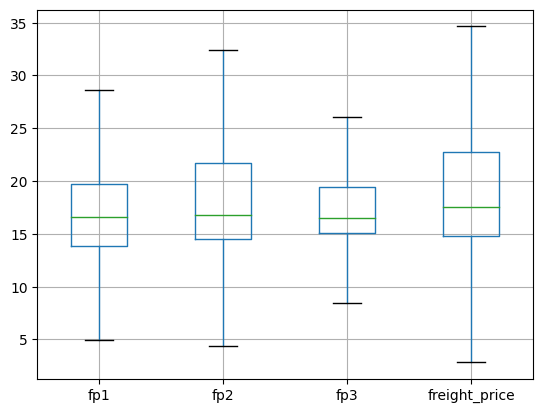

In [11]:
data.boxplot(column=['fp1','fp2','fp3','freight_price']) ##outlier
plt.show()

In [12]:
print('fp1:',data['fp1'].mean())
print('fp2:',data['fp2'].mean())
print('fp3:',data['fp3'].mean())
print('freight_price:',data['freight_price'].mean())

fp1: 17.28922681167308
fp2: 18.35945993175
fp3: 17.45779727318417
freight_price: 19.70615922704586


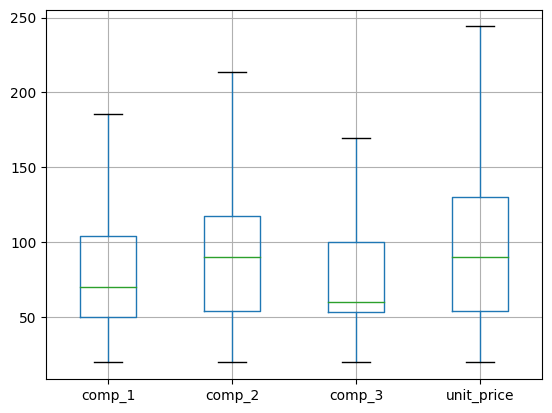

In [13]:
data.boxplot(column=['comp_1','comp_2','comp_3','unit_price']) ##outlier
plt.show()

In [14]:
print('comp_1:',data['comp_1'].mean())
print('comp_2:',data['comp_2'].mean())
print('comp_3:',data['comp_3'].mean())
print('unit_price:',data['unit_price'].mean())

comp_1: 78.20353526130178
comp_2: 91.51433010495563
comp_3: 82.05401070880177
unit_price: 100.52831097470414


In [15]:
px.bar(data, x='product_category_name',y='total_price', title='Total price per Category')

*We can see that consoles_games and perfumery are having least total price.*

<Axes: >

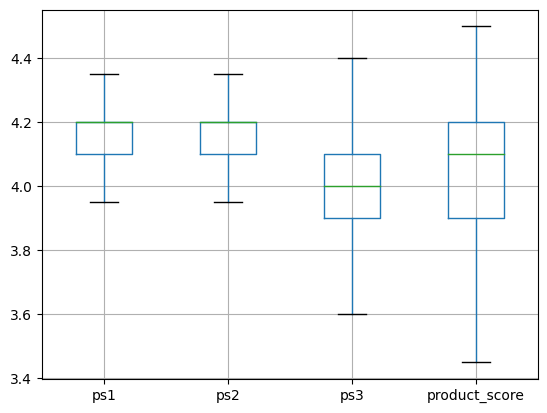

In [16]:
data.boxplot(column=['ps1','ps2','ps3','product_score'])##outlier

In [17]:
customer_count = data.groupby('product_id')['customers'].sum()

In [18]:
data['product_id'].unique()

array(['bed1', 'garden5', 'consoles1', 'garden7', 'health9', 'cool4',
       'health3', 'perfumery1', 'cool5', 'health8', 'garden4',
       'computers5', 'garden10', 'computers6', 'health6', 'garden6',
       'health10', 'watches2', 'health1', 'garden8', 'garden9',
       'watches6', 'cool3', 'perfumery2', 'cool2', 'computers1',
       'consoles2', 'health5', 'watches8', 'furniture4', 'watches5',
       'health7', 'bed3', 'garden3', 'bed2', 'furniture3', 'watches4',
       'watches3', 'furniture2', 'garden2', 'furniture1', 'health2',
       'garden1', 'cool1', 'computers4', 'watches7', 'computers3',
       'health4', 'watches1', 'computers2', 'bed4', 'bed5'], dtype=object)

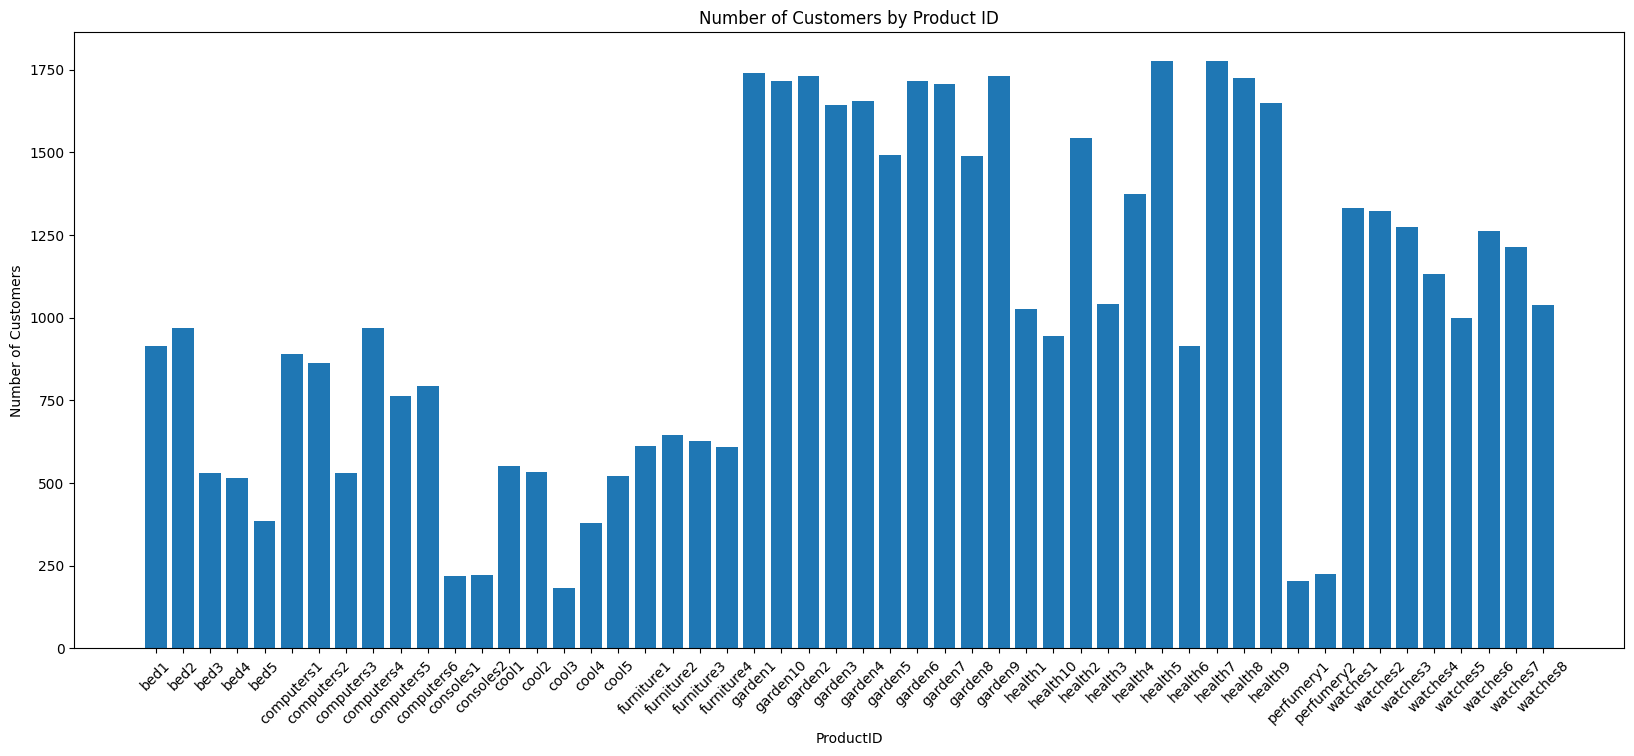

In [19]:
# Create a bar chart
plt.figure(figsize=(20,8))
plt.bar(customer_count.index, customer_count.values)
plt.xticks(rotation = 45)
plt.xlabel('ProductID')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Product ID')
plt.show()

*We can see that Garden, Health and watches are having highest demands*

In [20]:
corr = data.corr()


<ipython-input-20-17182710d970>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



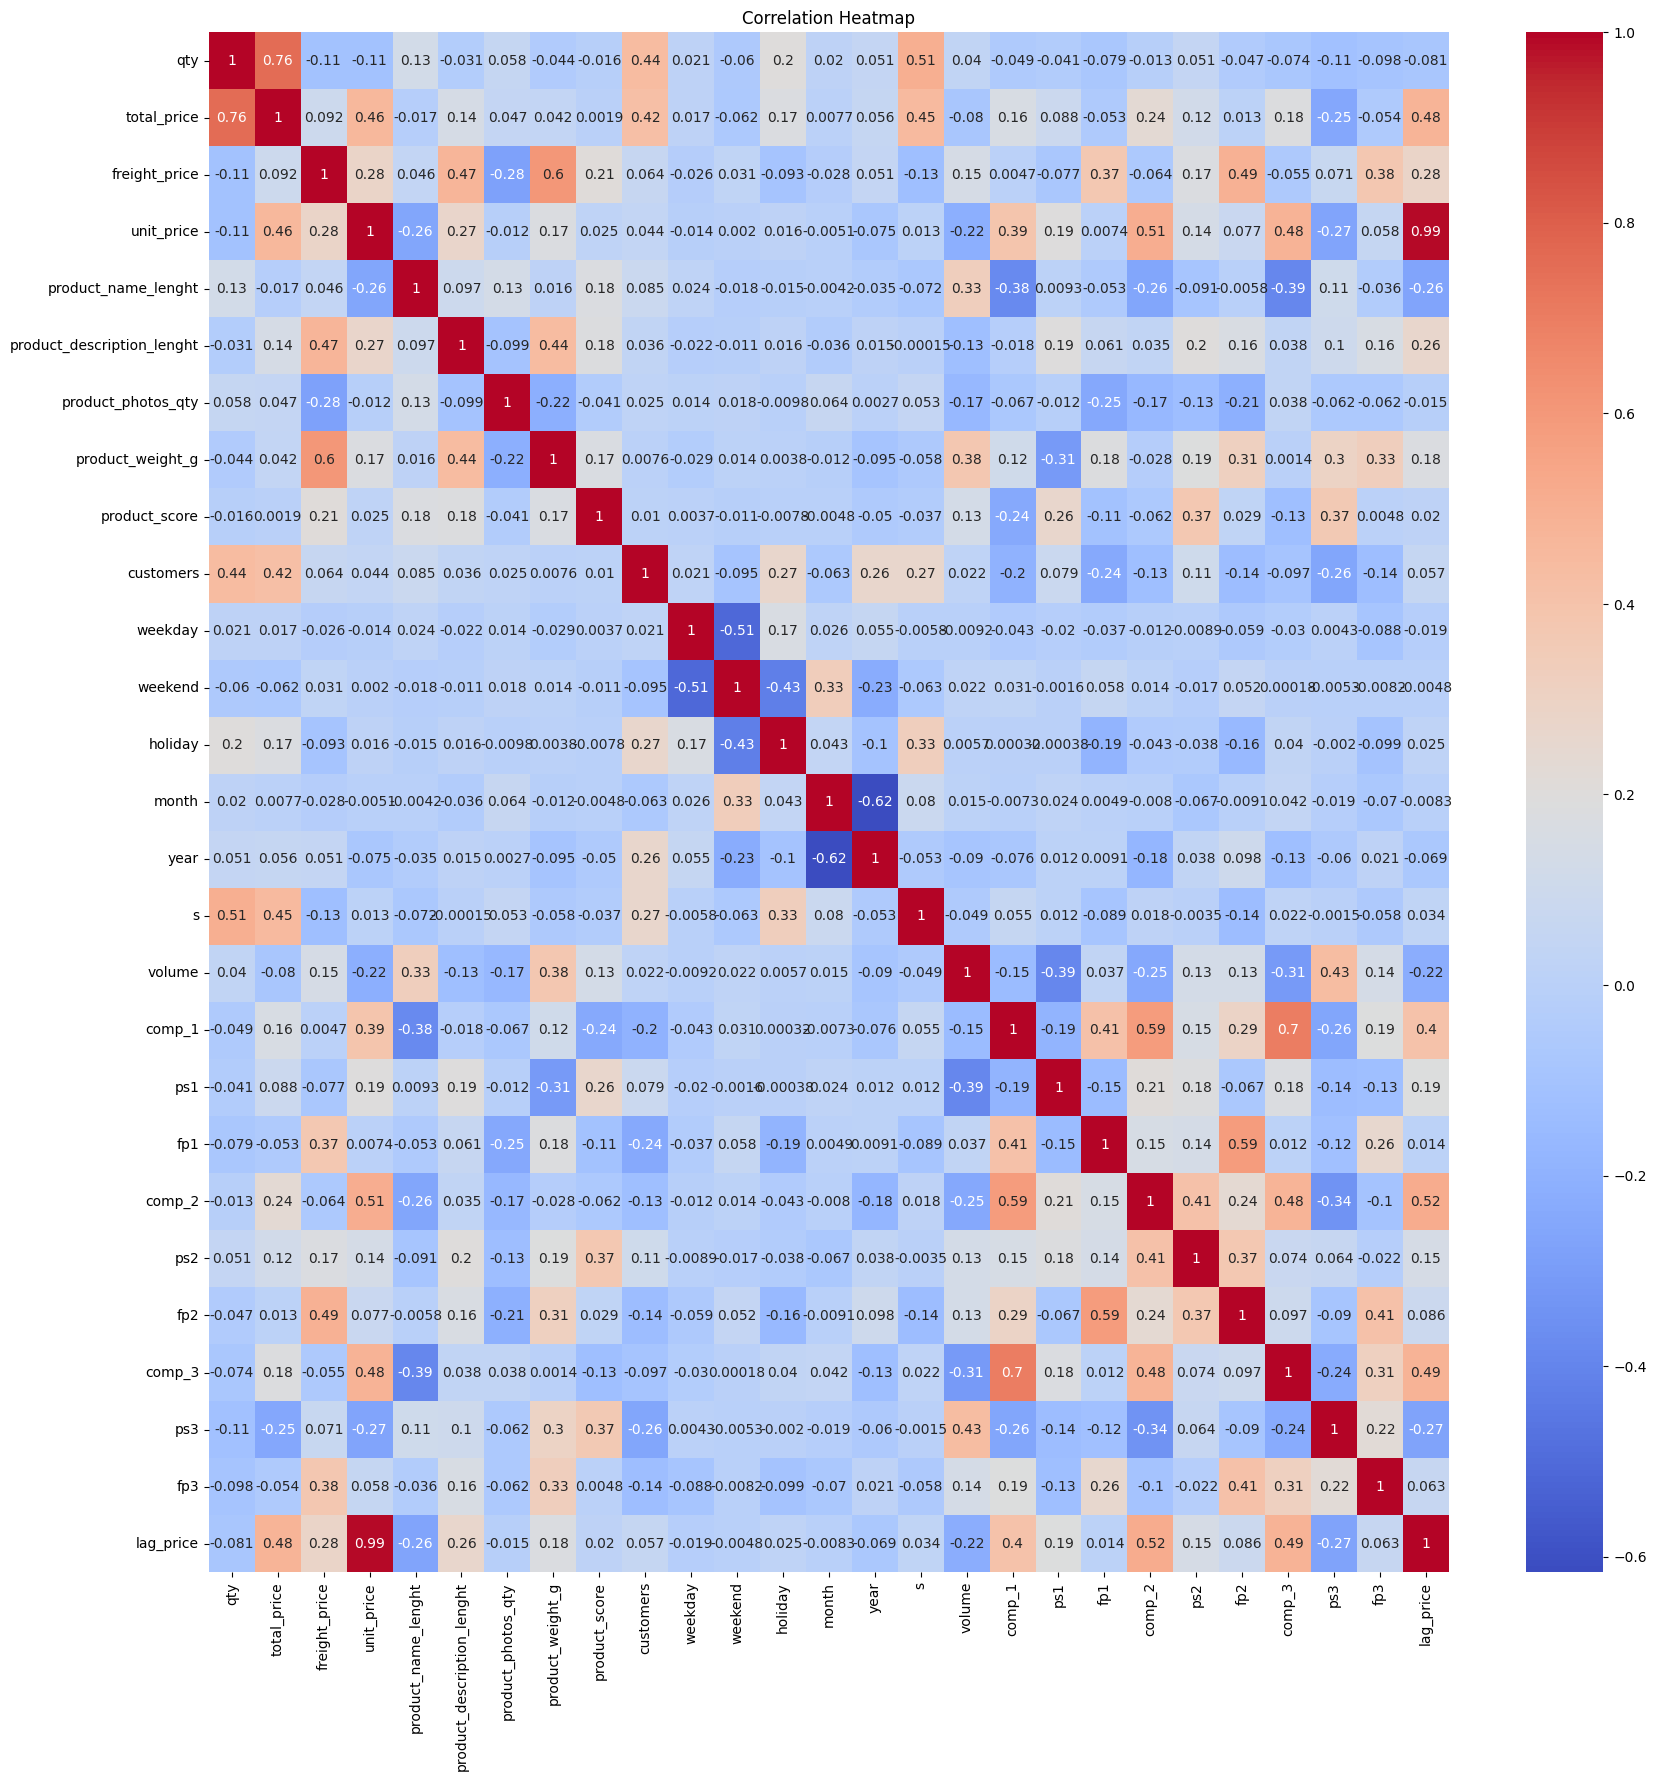

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
data = data.drop('s', axis = 1)

**Month with highest demand**

In [23]:
customer_month = data.groupby('month')['customers'].sum()

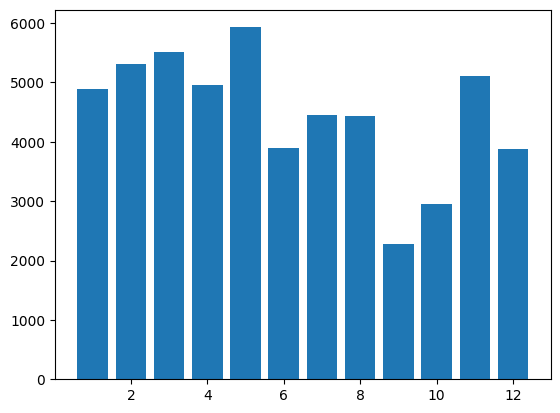

In [24]:
plt.bar(customer_month.index, customer_month.values)
plt.show()

*We can see that the demand is particularly high in the first half*

In [25]:
# Removing duplicates
data.duplicated().sum()

0

In [26]:
# Checking data types
data.dtypes

product_id                     object
product_category_name          object
month_year                     object
qty                           float64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_score                 float64
customers                     float64
weekday                       float64
weekend                       float64
holiday                       float64
month                         float64
year                          float64
volume                        float64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3                        float64
ps3         

In [27]:
# One hot encoding
data = pd.get_dummies(data, columns=['product_id'])
data.sample(3)

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,product_id_perfumery1,product_id_perfumery2,product_id_watches1,product_id_watches2,product_id_watches3,product_id_watches4,product_id_watches5,product_id_watches6,product_id_watches7,product_id_watches8
220,watches_gifts,01-02-2018,14.0,2043.92,15.129286,145.994286,35.0,591.0,3.0,444.0,...,0,0,0,1,0,0,0,0,0,0
367,watches_gifts,01-07-2018,14.0,2200.00,16.657143,157.142857,35.0,640.0,1.0,335.0,...,0,0,0,0,0,0,0,0,0,1
557,garden_tools,01-10-2017,17.0,1619.93,34.641027,95.290000,58.0,1749.0,1.0,4103.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y = data['customers']
x = data.drop(['customers','product_category_name','month_year'],axis=1)

In [29]:
# Splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [30]:
# Model Random Forest
model = RandomForestRegressor(n_estimators=100)

# Fit the regressor with x and y data
model.fit(x,y)

RandomForestRegressor()

In [31]:
model.score(x_test,y_test)

0.9941020609425034

In [32]:
model.score(x_train,y_train)

0.9935843277597048